# PROBLEM 5: DBSCAN on toy-neighborhood data

You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3). You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset:
cluster originally empty, provided for your convenience pt a unique id for each data point
x point x-coordinate
y point y-coordinate
num neighbors number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within
As you can see, a tedious O(n^2) portion of the work has been done for you. Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work. 

In [69]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances
from sklearn.cluster import DBSCAN

In [70]:
def find_neighbors(P, eps, distance_mat):
    neighbors = [int(i) for i in np.where(distance_mat[P] < eps)[0].tolist()]

    #     neighbors = [int(i) for i in np.where(distance_mat[P] < eps)[0].tolist() if i!=P]
    return neighbors

def expand_cluster(D, labels, P, cluster_num, eps, MinPts, distmat):
    points_in_cluster = [P]
    i = 0
    while i < len(points_in_cluster):    
        P = points_in_cluster[i]
        NeighborPts = find_neighbors(P, eps, distmat)
        if len(NeighborPts) < MinPts:
            i += 1
            continue
    
        for Pn in NeighborPts:
            if labels[Pn] == -1:
                labels[Pn] = cluster_num 
            elif labels[Pn] == 0:
                labels[Pn] = cluster_num
                points_in_cluster.append(Pn)
        i += 1        

def DBSCAN_custom(D, eps, MinPts, distance_mat):
    labels = [0]*len(D)
    cluster_num = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
            continue
        
        NeighborPts = find_neighbors(P, eps, distance_mat)
        
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        
        else: 
            cluster_num += 1
            labels[P] = cluster_num
            expand_cluster(D, labels, P, cluster_num, eps, MinPts, distance_mat)
    
    return labels

## Toy Data 

In [71]:
# Get data as an array
dbscan_toy_data = pd.read_csv('dbscan.csv')
just_data_array = np.concatenate((dbscan_toy_data['x'].reshape(80,1), dbscan_toy_data['y'].reshape(80,1)), axis=1)
toy_data_dist_mat = euclidean_distances(just_data_array)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
toy_data_clusters = DBSCAN_custom(just_data_array, 7.5, 3, toy_data_dist_mat)

### Toy data clustering visualization, compared with sklearn's clustering 

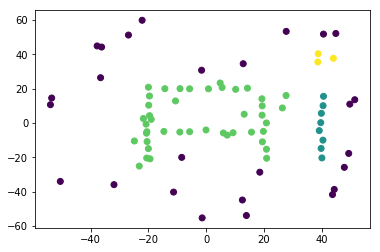

In [73]:
plt.scatter(just_data_array[:,0], just_data_array[:,1], c = toy_data_clusters)

In [74]:
np.unique(toy_data_clusters)

array([-1,  1,  2,  3])

Comparing it with sklearns clustering:

In [75]:
db = DBSCAN(eps = 7.5, min_samples=3).fit_predict(just_data_array)

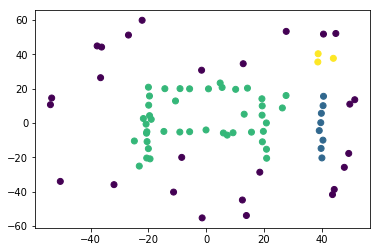

In [76]:
plt.scatter(just_data_array[:,0], just_data_array[:,1], c = db)

In [77]:
np.unique(db)

array([-1,  0,  1,  2], dtype=int64)

# PROBLEM 6: DBSCAN on toy raw data

Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. Run your own implementaion of DBSCAN on these, in two phases. 

## Blobs.csv

In [78]:
blobs = pd.read_csv('blobs.csv')

blobs_data = np.concatenate((blobs['Xblobs_X1'].reshape(len(blobs), 1), blobs['Xblobs_X2'].reshape(len(blobs), 1)), axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Sklearn clustering blobs.

In [79]:
db_blobs = DBSCAN(eps = 0.5, min_samples=3).fit_predict(blobs_data)

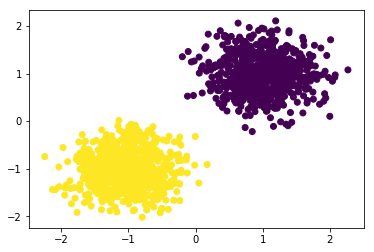

In [80]:
plt.scatter(blobs_data[:,0], blobs_data[:,1], c=db_blobs)

DBSCAN_custom clustering blobs.

In [81]:
blobs_dist_mat = euclidean_distances(blobs_data)

In [83]:
blobs_clusters = DBSCAN_custom(blobs_data, 10, 3, blobs_dist_mat)

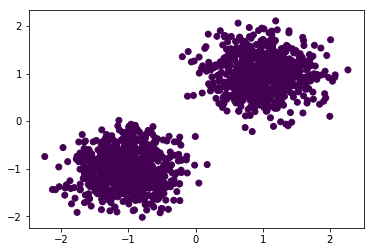

In [84]:
plt.scatter(blobs_data[:,0], blobs_data[:,1], c=blobs_clusters)

## Circle.csv 

In [85]:
circle = pd.read_csv('circle.csv')

circle_data = np.concatenate((circle['Xcircle_X1'].reshape(len(circle), 1), circle['Xcircle_X2'].reshape(len(circle), 1)), axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Sklearn clustering circle.

In [86]:
db_circle = DBSCAN(eps = 0.1, min_samples=3).fit_predict(circle_data)

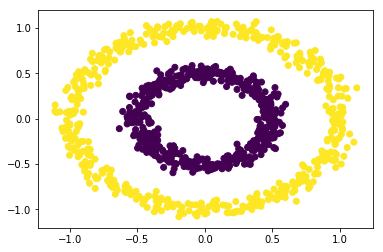

In [87]:
plt.scatter(circle_data[:,0], circle_data[:,1], c=db_circle)

DBSCAN_custom clustering circle.

In [90]:
circle_dist_mat = euclidean_distances(circle_data)

circle_clusters = DBSCAN_custom(circle_data, 10, 3, circle_dist_mat)

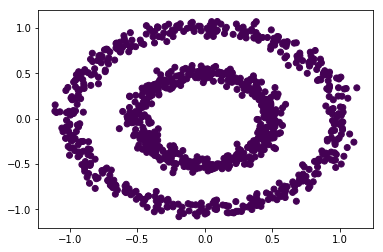

In [91]:
plt.scatter(circle_data[:,0], circle_data[:,1], c=circle_clusters)

## Moons.csv

In [92]:
moons = pd.read_csv('moons.csv')

moons_data = np.concatenate((moons['Xmoons_X1'].reshape(len(moons), 1), moons['Xmoons_X2'].reshape(len(moons), 1)), axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Sklearn clustering mooons

In [93]:
db_moons = DBSCAN(eps = 0.3, min_samples=3).fit_predict(moons_data)

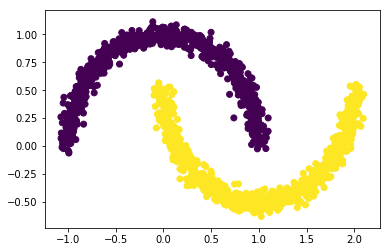

In [94]:
plt.scatter(moons_data[:,0], moons_data[:,1], c = db_moons)

DBSCAN_custom clustering moons.

In [95]:
moons_dist_mat = euclidean_distances(moons_data)

moon_clusters = DBSCAN_custom(moons_data, 0.3, 3, moons_dist_mat)

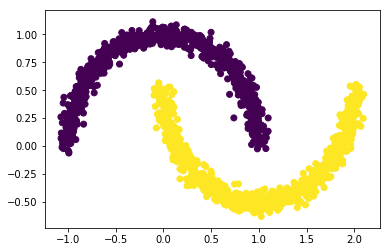

In [96]:
plt.scatter(moons_data[:,0], moons_data[:,1], c = moon_clusters)